In [3]:
# Import modules
from RFDN import RFDN1, RFDN
from compare import Compare, t_test
import numpy as np

In [2]:
model1 = RFDN1(nf=10, upscale=2)
model2 = RFDN(nf=10, upscale=2)
checkpoint_file1 = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/RFDN1/checkpoint_40.tar"
checkpoint_file2 = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/RFDN/checkpoint_2_40.tar"
data_dir = "/home/samuel/Documents/CMPUT511/Project/Data"

comp = Compare(model1, model2, checkpoint_file1, checkpoint_file2, data_dir)

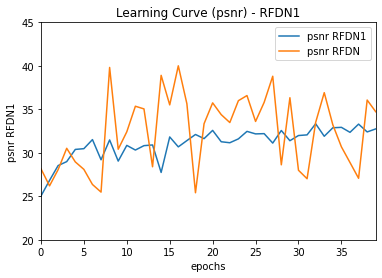

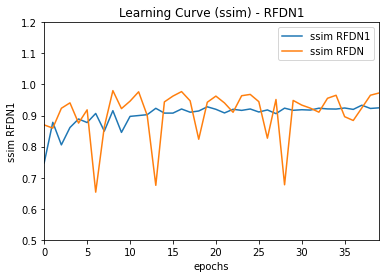

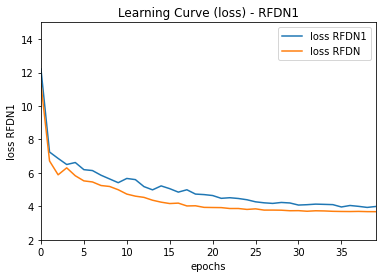

In [17]:
comp.plot_lc("psnr", x=(0, 39), y=(20, 45))
comp.plot_lc("ssim", x=(0, 39), y=(0.5, 1.2))
comp.plot_lc("loss", x=(0, 39), y=(2, 15))

In [4]:
# comp.predict("/home/samuel/Documents/CMPUT511/Project/Data/val/LR/DIV2K_valid_LR_bicubic/X2/0801x2.png", img_name="/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint")

In [5]:
# values = comp.get_values()

# psnr1 = np.mean(values["psnr"]["model1"])
# psnr2 = np.mean(values["psnr"]["model2"])
# ssim1 = np.mean(values["ssim"]["model1"])
# ssim2 = np.mean(values["ssim"]["model2"])
# times1 = np.mean(values["times"]["model1"])
# times2 = np.mean(values["times"]["model2"])

# print(f"Average inference PSNR for model 1 ({str(model1)}): {psnr1}")
# print(f"Average inference PSNR for model 2 ({str(model2)}): {psnr2}\n")
# print(f"Average inference SSIM for model 1 ({str(model1)}): {ssim1}")
# print(f"Average inference SSIM for model 2 ({str(model2)}): {ssim2}\n")
# print(f"Average inference time for model 1 ({str(model1)}): {times1}")
# print(f"Average inference time for model 2 ({str(model2)}): {times2}")

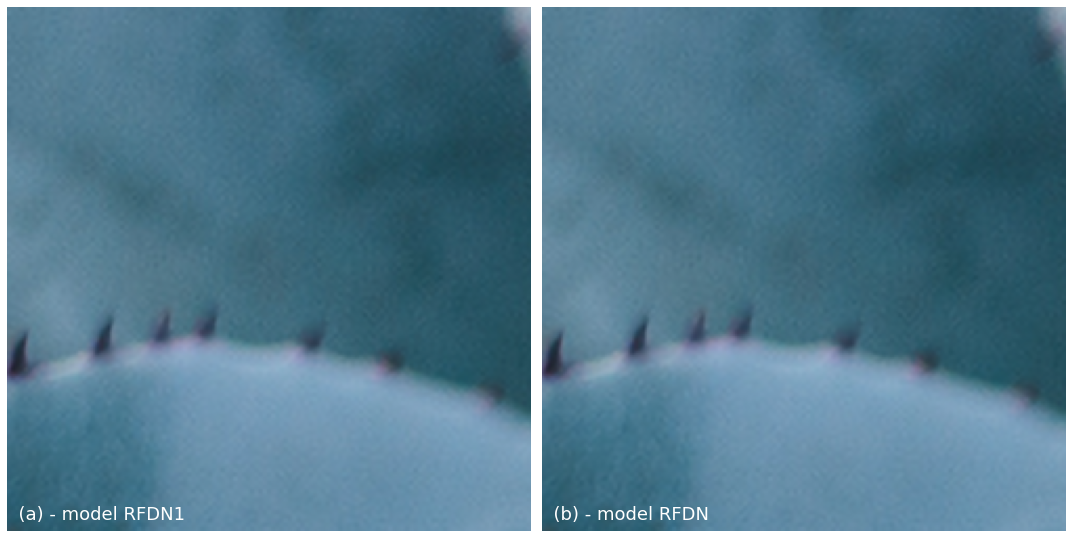

In [6]:
comp.compare_patches(56, size=250, start=(110,200))

# Statistical significance test
Here, we test to see if the PSNR, SSIM, and Loss values are statistically significant from each other. If they are, then we can say that most likely, one of the two models are better than the other. If they are not statistically significant, then we cannot say if any model is better. 

In [5]:
checkpoint_dir1 = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/RFDN1"
checkpoint_dir2 = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/RFDN"

p_psnr = t_test(checkpoint_dir1, checkpoint_dir2, "psnr")
p_ssim = t_test(checkpoint_dir1, checkpoint_dir2, "ssim")
p_loss = t_test(checkpoint_dir1, checkpoint_dir2, "loss")

print(f"P-value for PSNR: {p_psnr}")
print(f"P-value for SSIM: {p_ssim}")
print(f"P-value for Loss: {p_loss}")

P-value for PSNR: 0.37472092549792724
P-value for SSIM: 0.5757093039881409
P-value for Loss: 0.26575892570798293
